In [1]:
import numpy as np
import pandas as pd
import h5py
import os
from visualization_utility import plot_data
from NN_model_plots import plot_learning_curve, plot_random, plot_relative_errors, plot_errors_hist
from emulator_preds import load_emulator_preds
from RT_model_val_data import load_RT_model_outputs

[NbConvertApp] Converting notebook visualization_utility.ipynb to script
[NbConvertApp] Writing 7407 bytes to visualization_utility.py
[NbConvertApp] Converting notebook NN_model_plots.ipynb to script
[NbConvertApp] Writing 5394 bytes to NN_model_plots.py
[NbConvertApp] Converting notebook emulator_preds.ipynb to script
[NbConvertApp] Writing 1278 bytes to emulator_preds.py
[NbConvertApp] Converting notebook RT_model_val_data.ipynb to script
[NbConvertApp] Writing 1295 bytes to RT_model_val_data.py


In [2]:
NN_data_path = "/fmi/projappl/project_2004400/jamin/data/libradtran_data/NN_data/"

<h3>RT outputs</h3>

In [3]:
RT_outputs = load_RT_model_outputs(NN_data_path)

In [9]:
edif_RT = RT_outputs["edif_val_RT"]
edir_RT = RT_outputs["edir_val_RT"]
path_rad_RT = RT_outputs["path_rad_val_RT"]
spherical_albedo_RT = RT_outputs["spherical_albedo_val_RT"]
tdif_RT = RT_outputs["tdif_up_val_RT"]
tdir_RT = RT_outputs["tdir_up_val_RT"]

<h3>Emulated outputs</h3>

In [10]:
emulator_outputs = load_emulator_preds(NN_data_path)

In [11]:
edif_preds = emulator_outputs["edif_preds"]
edir_preds = emulator_outputs["edir_preds"]
path_rad_preds = emulator_outputs["path_rad_preds"]
spherical_albedo_preds = emulator_outputs["spherical_albedo_preds"]
tdif_preds = emulator_outputs["tdif_up_preds"]
tdir_preds = emulator_outputs["tdir_up_preds"]

<h3>Calculate L_TOA</h3>

\begin{align*}
    L\_TOA = \text{path_rad} \, + \, \frac{(\text{edir} + \text{edif}) * (\text{tdir} + \text{tdif}) \, * \, \text{albedo}}{\pi \, * \, (1 - \text{spherical_albedo} \, * \, albedo)}
\end{align*}

In [17]:
albedo = 0.15

In [18]:
L_TOA_RT = path_rad_RT + ((edir_RT + edif_RT) * (tdir_RT + tdif_RT) * albedo) / (np.pi * (1 - spherical_albedo_RT * albedo))

In [21]:
L_TOA_emulated = path_rad_preds + ((edir_preds + edif_preds) * (tdir_preds + tdif_preds) * albedo) / (np.pi * (1 - spherical_albedo_preds * albedo)) 

<h3>Plotting</h3>

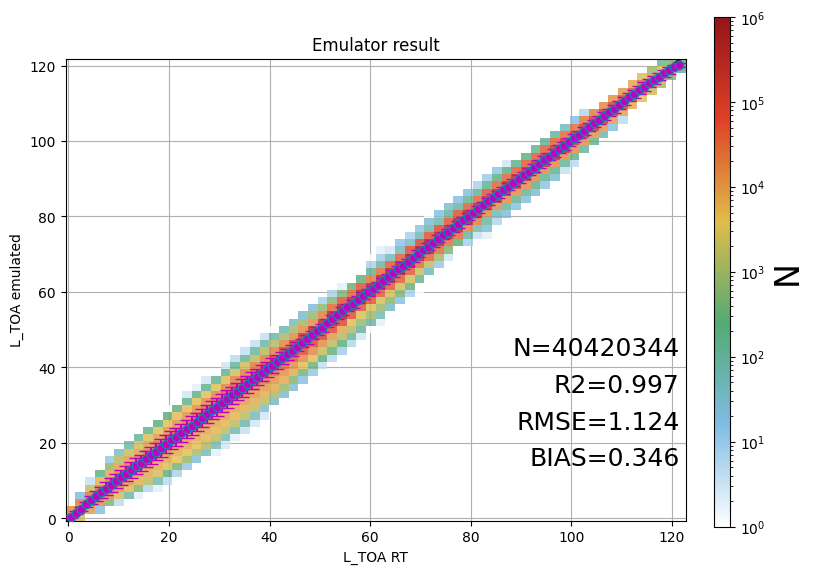

In [23]:
plot_data(y_true=L_TOA_RT,
          y_pred=L_TOA_emulated,
          title="Emulator result",
          x_label="L_TOA RT",
          y_label="L_TOA emulated",
          error_bar_on=True,
          save_fig=False,
          fig_name=None)